In [1]:
import json
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import StatsbombPitch as sb
#import squarify
from functools import reduce
path = "/home/kirugulige/Documents/Football-Analytics/open-data-master/data/events/"
Xg_req = pd.DataFrame(data=None)
filename = '69275.json'    
with open("%s" % path + filename,encoding="utf8") as data_file:    
    data = json.load(data_file)
    df = pd.DataFrame(data=None)
        
    df = pd.json_normalize(data, sep = "_")
        
        #df =  df[(df['type_name'] == "Shot")]
        #df = df.loc[:,['location','shot_body_part_id','shot_end_location','shot_one_on_one','shot_technique_id','shot_type_id','under_pressure','shot_outcome_id']]
        #print(df.shape)
Xg_req = Xg_req.append(df,ignore_index=True,sort=False)
        #df.drop(df.index, inplace=True)
        
print("done")
df = Xg_req

done


In [2]:
through_ball = df.query('pass_through_ball == True')

In [3]:
assist = df.query('pass_goal_assist == True')
print(len(assist.index))

4


In [4]:
through_ball= through_ball[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
through_ball.head()

,id,period,timestamp,location,pass_end_location,pass_recipient_name
280,1f6ef40d-cd32-4566-add6-f1558833d0c1,1,00:05:57.827,"[81.5, 37.8]","[103.1, 33.4]",Pablo Daniel Osvaldo
604,4040c0ab-d934-469b-84f5-c595213b851b,1,00:13:56.420,"[48.2, 57.4]","[85.5, 38.3]",Pablo Daniel Osvaldo
794,7dbe04a8-41c5-4ea8-bfa1-892fe23a72e6,1,00:18:30.829,"[66.8, 46.7]","[93.5, 38.5]",Pedro Eliezer Rodríguez Ledesma
840,3a7da0a1-e9c4-40a1-9702-e99c5ace03c2,1,00:20:46.623,"[66.0, 56.5]","[105.5, 34.7]",José María Callejón Bueno
962,2bc53e64-664a-4f83-9d0c-6b046d91a7d9,1,00:23:55.494,"[81.5, 28.1]","[94.2, 31.7]",David Villa Sánchez


In [5]:
assist= assist[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
assist.head()

,id,period,timestamp,location,pass_end_location,pass_recipient_name
794,7dbe04a8-41c5-4ea8-bfa1-892fe23a72e6,1,00:18:30.829,"[66.8, 46.7]","[93.5, 38.5]",Pedro Eliezer Rodríguez Ledesma
2436,9810ac65-15b8-4736-a09e-08f7faaff01d,2,00:17:04.830,"[52.7, 63.4]","[84.2, 57.1]",Pablo Daniel Osvaldo
2935,7269b3a6-43d7-45bc-8823-bcfd1542ad45,2,00:30:03.492,"[64.4, 33.8]","[79.4, 25.5]",David Villa Sánchez
3344,dc1b453d-6e7e-49b1-ad88-79525e8223f9,2,00:38:47.689,"[70.1, 30.6]","[98.0, 23.3]",David Villa Sánchez


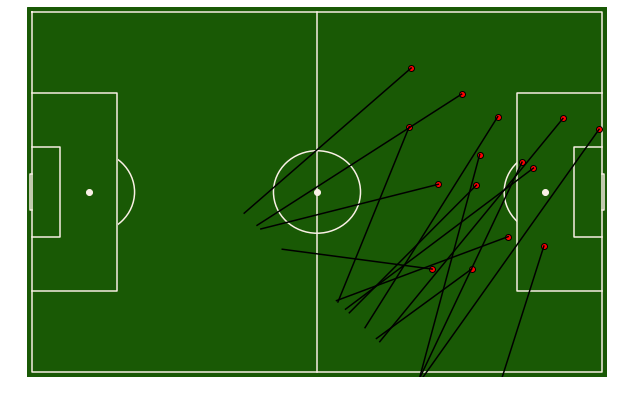

In [6]:
sb.sb_pitch("#195905","#faf0e6","horizontal","full")
plt.gca().invert_yaxis() #overlay our different objects on the pitch
#plt.ylim(-2, 82)
#plt.xlim(-2, 122)
#plt.plot(x_axis,y_axis,'ro')
#plt.plot(x,y,'bo')
plt.axis('off')
for i in range(len(through_ball)):
    x = through_ball.iloc[i]['pass_end_location'][0]
    y = through_ball.iloc[i]['pass_end_location'][1]
    xe = through_ball.iloc[i]['location'][0]
    ye = through_ball.iloc[i]['location'][0]
    plt.scatter(x,y,color="red",edgecolors="black",zorder=10,alpha=1)
    plt.plot([x,xe],[y,ye],zorder=11,alpha=1,color="black")

"""
for i in range(len(assist)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (assist.iloc[i]['pass_end_location'][0], assist.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (assist.iloc[i]['location'][0], assist.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"),)
"""

plt.show()

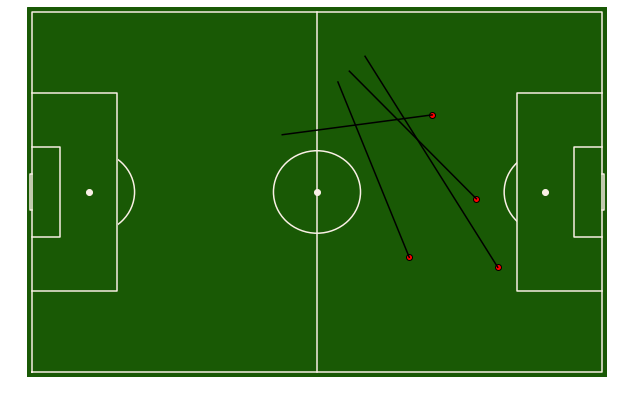

In [7]:
sb.sb_pitch("#195905","#faf0e6","horizontal","full")
plt.gca().invert_yaxis() #overlay our different objects on the pitch
#plt.ylim(-2, 82)
#plt.xlim(-2, 122)
#plt.plot(x_axis,y_axis,'ro')
#plt.plot(x,y,'bo')

plt.gca().invert_yaxis()
for i in range(len(assist)):
    x = assist.iloc[i]['pass_end_location'][0]
    y = assist.iloc[i]['pass_end_location'][1]
    xe = assist.iloc[i]['location'][0]
    ye = assist.iloc[i]['location'][0]
    plt.scatter(x,y,color="red",edgecolors="black",zorder=10,alpha=1)
    plt.plot([x,xe],[y,ye],zorder=11,alpha=1,color="black")


plt.show()